<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/main/trail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install lazypredict

In [47]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [71]:
train_data = pd.read_csv("/content/combined_dataset_fs.csv")
test_data = pd.read_csv("/content/combined_dataset_test.csv")

In [72]:
y_train = train_data['bioactivity_class']
y_test = test_data['bioactivity_class']
X_train = train_data.drop(columns=['bioactivity_class'])
X_test = test_data.drop(columns=['bioactivity_class'])

In [76]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 31/32 [00:34<00:00,  3.12it/s]

[LightGBM] [Info] Number of positive: 987, number of negative: 830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2637
[LightGBM] [Info] Number of data points in the train set: 1817, number of used features: 421
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543203 -> initscore=0.173244
[LightGBM] [Info] Start training from score 0.173244


100%|██████████| 32/32 [00:35<00:00,  1.12s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:31<00:00,  4.37it/s]

[LightGBM] [Info] Number of positive: 987, number of negative: 830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2637
[LightGBM] [Info] Number of data points in the train set: 1817, number of used features: 421
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543203 -> initscore=0.173244
[LightGBM] [Info] Start training from score 0.173244


100%|██████████| 32/32 [00:32<00:00,  1.01s/it]


In [78]:
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,1.00,1.00,0.68
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.18
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.11
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.06
LabelPropagation,1.00,1.00,1.00,1.00,0.69
LabelSpreading,1.00,1.00,1.00,1.00,0.93
LGBMClassifier,1.00,1.00,1.00,1.00,0.90
BaggingClassifier,0.99,0.99,0.99,0.99,0.73
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.37


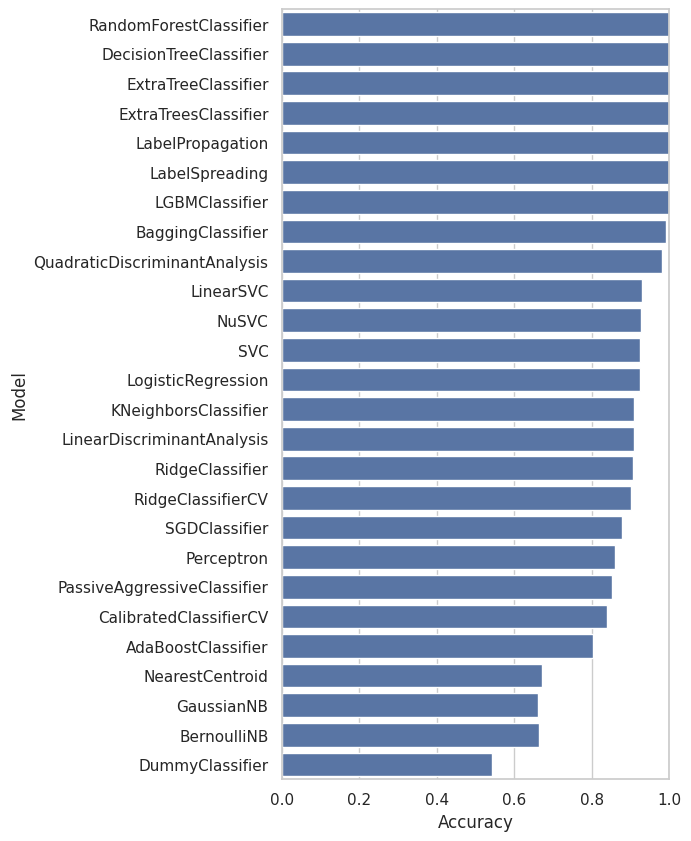

In [85]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Assuming 'R-Squared' is the correct column name:
ax = sns.barplot(y=predictions_train.index, x=predictions_train['Accuracy'], data=predictions_train)

#If you have a column with R2 Score, you may need to rename the column to 'R-Squared'
#predictions_train = predictions_train.rename(columns={'Name of your column with R2 Score': 'R-Squared'})
#ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)


ax.set(xlim=(0, 1))
plt.show()